# Demo MAGxLR_1B (magnetic field 1Hz)

> Authors: Ashley Smith
>
> Abstract: Access to the low rate (1Hz) magnetic data (level 1b product), together with geomagnetic model evaluations (level 2 products).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2021-01-24T15:45:21+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.7.1
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()

## MAGX_LR_1B product information

This is one of the main products from Swarm - the 1Hz measurements of the magnetic field vector (`B_NEC`) and total intensity (`F`). These are derived from the Vector Field Magnetometer (VFM) and Absolute Scalar Magnetomer (ASM).

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_LR_1B_Product

Measurements are available through VirES as part of collections with names containing `MAGx_LR`, for each Swarm spacecraft:

In [3]:
request.available_collections("MAG", details=False)

{'MAG': ['SW_OPER_MAGA_LR_1B', 'SW_OPER_MAGB_LR_1B', 'SW_OPER_MAGC_LR_1B']}

The measurements can be used together with geomagnetic model evaluations as shall be shown below.

### Check what "MAG" data variables are available

In [4]:
request.available_measurements("MAG")

['F',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

### Check the names of available models

In [5]:
request.available_models(details=False)

['IGRF',
 'LCS-1',
 'MF7',
 'CHAOS-Core',
 'CHAOS-Static',
 'CHAOS-MMA-Primary',
 'CHAOS-MMA-Secondary',
 'MCO_SHA_2C',
 'MCO_SHA_2D',
 'MLI_SHA_2C',
 'MLI_SHA_2D',
 'MLI_SHA_2E',
 'MMA_SHA_2C-Primary',
 'MMA_SHA_2C-Secondary',
 'MMA_SHA_2F-Primary',
 'MMA_SHA_2F-Secondary',
 'MIO_SHA_2C-Primary',
 'MIO_SHA_2C-Secondary',
 'MIO_SHA_2D-Primary',
 'MIO_SHA_2D-Secondary',
 'AMPS',
 'MCO_SHA_2X',
 'CHAOS',
 'CHAOS-MMA',
 'MMA_SHA_2C',
 'MMA_SHA_2F',
 'MIO_SHA_2C',
 'MIO_SHA_2D',
 'SwarmCI']

## Fetch one hour of MAG data and models, at 10-second sampling

In [6]:
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    sampling_step="PT10S"
)
data = request.get_between(
    # 2014-01-01 00:00:00
    start_time = dt.datetime(2014,1,1, 0),
    # 2014-01-01 01:00:00
    end_time = dt.datetime(2014,1,1, 1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.098MB)


### See a list of the input files

In [7]:
data.sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20210526T235959_0705']

### Transfer data to a pandas dataframe:

In [8]:
df = data.as_dataframe()
df.head()

F_MCO_SHA_2D  \
Timestamp                           
2014-01-01 00:00:00  22874.211509   
2014-01-01 00:00:10  22820.941425   
2014-01-01 00:00:20  22769.369161   
2014-01-01 00:00:30  22719.238240   
2014-01-01 00:00:40  22670.304681   

                                                                 B_NEC  \
Timestamp                                                                
2014-01-01 00:00:00      [20103.5246, -4126.2621, -10086.988800000001]   
2014-01-01 00:00:10              [19815.0914, -4160.9933, -10514.4074]   
2014-01-01 00:00:20  [19523.4946, -4195.196800000001, -10926.966400...   
2014-01-01 00:00:30              [19229.2386, -4228.4747, -11324.8335]   
2014-01-01 00:00:40              [18932.8807, -4260.8424, -11708.0897]   

                              F Spacecraft      Radius  Latitude  Longitude  \
Timestamp                                                                     
2014-01-01 00:00:00  22867.5503          A  6878309.22 -1.228938 -14.116674   
2014-01-01 00:00:10  22814.5656          A  6878381.17 -1.862521 -14.131424   
2014-01-01 00:00:20  22763.2585          A  6878452.05 -2.496090 -14.146155   
2014-01-01 00:00:30  22713.3703          A  6878521.87 -3.129644 -14.160861   
2014-01-01 00:00:40  22664.7202          A  6878590.61 -3.763184 -14.175534   

                     F_CHAOS-Core  \
Timestamp                           
2014-01-01 00:00:00  22874.580109   
2014-01-01 00:00:10  22821.316363   
2014-01-01 00:00:20  22769.746082   
2014-01-01 00:00:30  22719.613020   
2014-01-01 00:00:40  22670.673539   

                                                      B_NEC_CHAOS-Core  \
Timestamp                                                                
2014-01-01 00:00:00  [20113.33871534297, -4127.023256760892, -10083...   
2014-01-01 00:00:10  [19824.843984083705, -4162.664701084325, -1051...   
2014-01-01 00:00:20  [19533.200506222718, -4197.0443252580635, -109...   
2014-01-01 00:00:30  [19238.95246531388, -4230.095511676884, -11320...   
2014-01-01 00:00:40  [18942.644962034465, -4261.75308572276, -11703...   

                                                      B_NEC_MCO_SHA_2D  
Timestamp                                                               
2014-01-01 00:00:00  [20113.62392147383, -4127.463956127047, -10081...  
2014-01-01 00:00:10  [19825.16184358055, -4163.127549318375, -10508...  
2014-01-01 00:00:20  [19533.553905492434, -4197.529053749354, -1092...  
2014-01-01 00:00:30  [19239.343572344795, -4230.60181901415, -11318...  
2014-01-01 00:00:40  [18943.075143502585, -4262.280633762369, -1170...

Use `expand=True` to extract vectors (B_NEC...) as separate columns (..._N, ..._E, ..._C)

In [9]:
df = data.as_dataframe(expand=True)
df.head()

F_MCO_SHA_2D           F Spacecraft      Radius  \
Timestamp                                                              
2014-01-01 00:00:00  22874.211509  22867.5503          A  6878309.22   
2014-01-01 00:00:10  22820.941425  22814.5656          A  6878381.17   
2014-01-01 00:00:20  22769.369161  22763.2585          A  6878452.05   
2014-01-01 00:00:30  22719.238240  22713.3703          A  6878521.87   
2014-01-01 00:00:40  22670.304681  22664.7202          A  6878590.61   

                     Longitude  F_CHAOS-Core  Latitude     B_NEC_N    B_NEC_E  \
Timestamp                                                                       
2014-01-01 00:00:00 -14.116674  22874.580109 -1.228938  20103.5246 -4126.2621   
2014-01-01 00:00:10 -14.131424  22821.316363 -1.862521  19815.0914 -4160.9933   
2014-01-01 00:00:20 -14.146155  22769.746082 -2.496090  19523.4946 -4195.1968   
2014-01-01 00:00:30 -14.160861  22719.613020 -3.129644  19229.2386 -4228.4747   
2014-01-01 00:00:40 -14.175534  22670.673539 -3.763184  18932.8807 -4260.8424   

                        B_NEC_C  B_NEC_CHAOS-Core_N  B_NEC_CHAOS-Core_E  \
Timestamp                                                                 
2014-01-01 00:00:00 -10086.9888        20113.338715        -4127.023257   
2014-01-01 00:00:10 -10514.4074        19824.843984        -4162.664701   
2014-01-01 00:00:20 -10926.9664        19533.200506        -4197.044325   
2014-01-01 00:00:30 -11324.8335        19238.952465        -4230.095512   
2014-01-01 00:00:40 -11708.0897        18942.644962        -4261.753086   

                     B_NEC_CHAOS-Core_C  B_NEC_MCO_SHA_2D_N  \
Timestamp                                                     
2014-01-01 00:00:00       -10083.040213        20113.623921   
2014-01-01 00:00:10       -10510.007809        19825.161844   
2014-01-01 00:00:20       -10922.464628        19533.553905   
2014-01-01 00:00:30       -11320.327547        19239.343572   
2014-01-01 00:00:40       -11703.550793        18943.075144   

                     B_NEC_MCO_SHA_2D_E  B_NEC_MCO_SHA_2D_C  
Timestamp                                                    
2014-01-01 00:00:00        -4127.463956       -10081.454567  
2014-01-01 00:00:10        -4163.127549       -10508.410652  
2014-01-01 00:00:20        -4197.529054       -10920.860481  
2014-01-01 00:00:30        -4230.601819       -11318.721366  
2014-01-01 00:00:40        -4262.280634       -11701.947796

### ... or to an xarray Dataset:

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:           (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC               (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    F_MCO_SHA_2D      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.021e+04
    B_NEC_CHAOS-Core  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
    F                 (Timestamp) float64 2.287e+04 2.281e+04 ... 4.021e+04
    Radius            (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    B_NEC_MCO_SHA_2D  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
    Longitude         (Timestamp) float64 -14.12 -14.13 -14.15 ... 153.6 153.6
    F_CHAOS-Core      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.02e+04
    B_NEC             (Timestamp, NEC) float64 2.01e+04 -4.126e+03 ... 3.558e+04
    Latitude          (Timestamp) float64 -1.229 -1.863 -2.496 ... 48.14 48.77
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    RangeFilters:    []

In [11]:
ds.Sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20210526T235959_0705']

### Instead, fetch the residuals directly

Adding `residuals=True` to `.set_products()` will instead directly evaluate and return all data-model residuals

In [12]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.081MB)


Spacecraft      Radius  F_res_MCO_SHA_2D  Longitude  \
Timestamp                                                                 
2014-01-01 00:00:00          A  6878309.22         -6.661209 -14.116674   
2014-01-01 00:00:10          A  6878381.17         -6.375825 -14.131424   
2014-01-01 00:00:20          A  6878452.05         -6.110661 -14.146155   
2014-01-01 00:00:30          A  6878521.87         -5.867940 -14.160861   
2014-01-01 00:00:40          A  6878590.61         -5.584481 -14.175534   

                     F_res_CHAOS-Core  Latitude  B_NEC_res_MCO_SHA_2D_N  \
Timestamp                                                                 
2014-01-01 00:00:00         -7.029809 -1.228938              -10.099321   
2014-01-01 00:00:10         -6.750763 -1.862521              -10.070444   
2014-01-01 00:00:20         -6.487582 -2.496090              -10.059305   
2014-01-01 00:00:30         -6.242720 -3.129644              -10.104972   
2014-01-01 00:00:40         -5.953339 -3.763184              -10.194444   

                     B_NEC_res_MCO_SHA_2D_E  B_NEC_res_MCO_SHA_2D_C  \
Timestamp                                                             
2014-01-01 00:00:00                1.201856               -5.534233   
2014-01-01 00:00:10                2.134249               -5.996748   
2014-01-01 00:00:20                2.332254               -6.105919   
2014-01-01 00:00:30                2.127119               -6.112134   
2014-01-01 00:00:40                1.438234               -6.141904   

                     B_NEC_res_CHAOS-Core_N  B_NEC_res_CHAOS-Core_E  \
Timestamp                                                             
2014-01-01 00:00:00               -9.814115                0.761157   
2014-01-01 00:00:10               -9.752584                1.671401   
2014-01-01 00:00:20               -9.705906                1.847525   
2014-01-01 00:00:30               -9.713865                1.620812   
2014-01-01 00:00:40               -9.764262                0.910686   

                     B_NEC_res_CHAOS-Core_C  
Timestamp                                    
2014-01-01 00:00:00               -3.948587  
2014-01-01 00:00:10               -4.399591  
2014-01-01 00:00:20               -4.501772  
2014-01-01 00:00:30               -4.505953  
2014-01-01 00:00:40               -4.538907

## Plot the scalar residuals for each model

### ... using the pandas method:

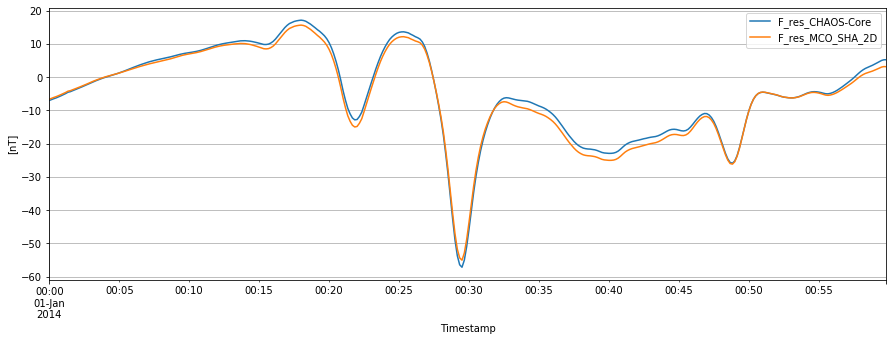

In [13]:
ax = df.plot(
    y=["F_res_CHAOS-Core", "F_res_MCO_SHA_2D"],
    figsize=(15,5),
    grid=True
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]");

### ... using matplotlib interface (Matlab-style)

NB: we are doing `plt.plot(x, y)` with `x` as `df.index` (the time-based index of df), and `y` as `df[".."]`

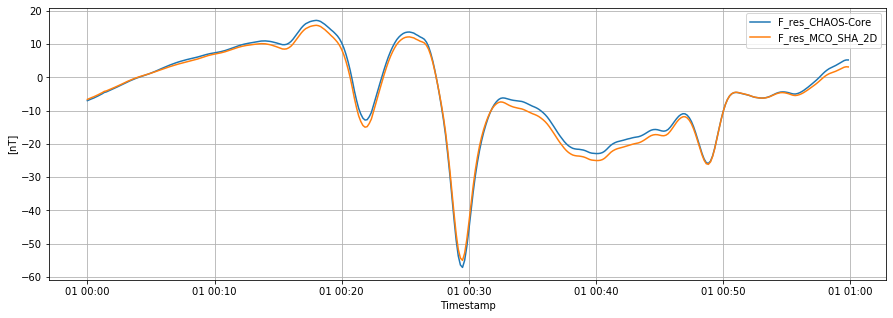

In [14]:
plt.figure(figsize=(15,5))
plt.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
plt.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
plt.xlabel("Timestamp")
plt.ylabel("[nT]")
plt.grid()
plt.legend();

### ... using matplotlib interface (Object Oriented style)

This is the recommended route for making more complicated figures

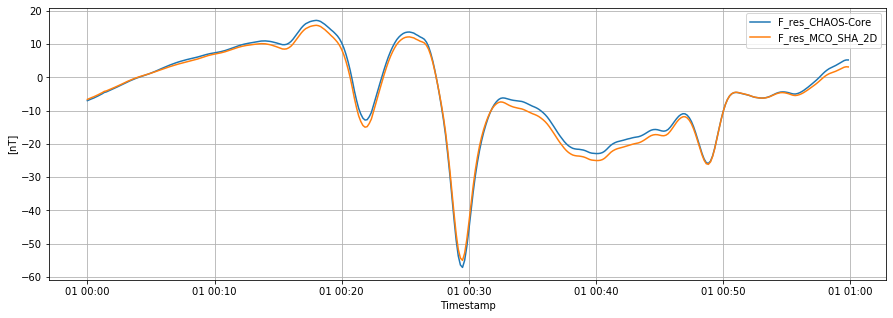

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
ax.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]")
ax.grid()
ax.legend();

## Plot the vector components

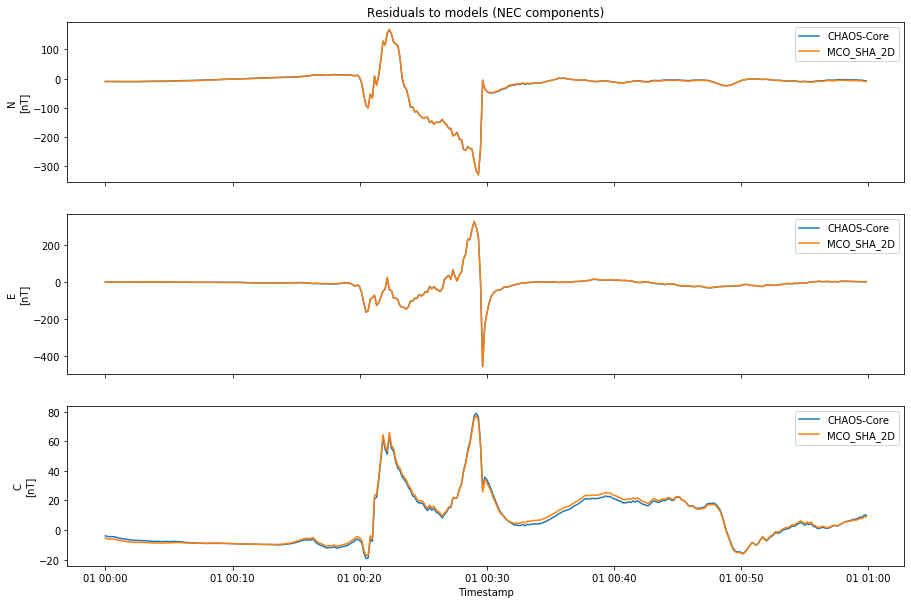

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for component, ax in zip("NEC", axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            df.index,
            df[f"B_NEC_res_{model_name}_{component}"],
            label=model_name
        )
    ax.set_ylabel(f"{component}\n[nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

## Similar plotting, using the data via xarray instead

xarray provides a more sophisticated data structure that is more suitable for the complex vector data we are accessing, together with nice stuff like unit and other metadata support. Unfortunately due to the extra complexity, this can make it difficult to use right away.

In [17]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:               (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    B_NEC_res_MCO_SHA_2D  (Timestamp, NEC) float64 -10.1 1.202 ... 2.782 8.984
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.814 0.7612 ... 2.925 10.1
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    F_res_MCO_SHA_2D      (Timestamp) float64 -6.661 -6.376 ... 3.153 3.108
    F_res_CHAOS-Core      (Timestamp) float64 -7.03 -6.751 ... 5.201 5.203
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    RangeFilters:    []

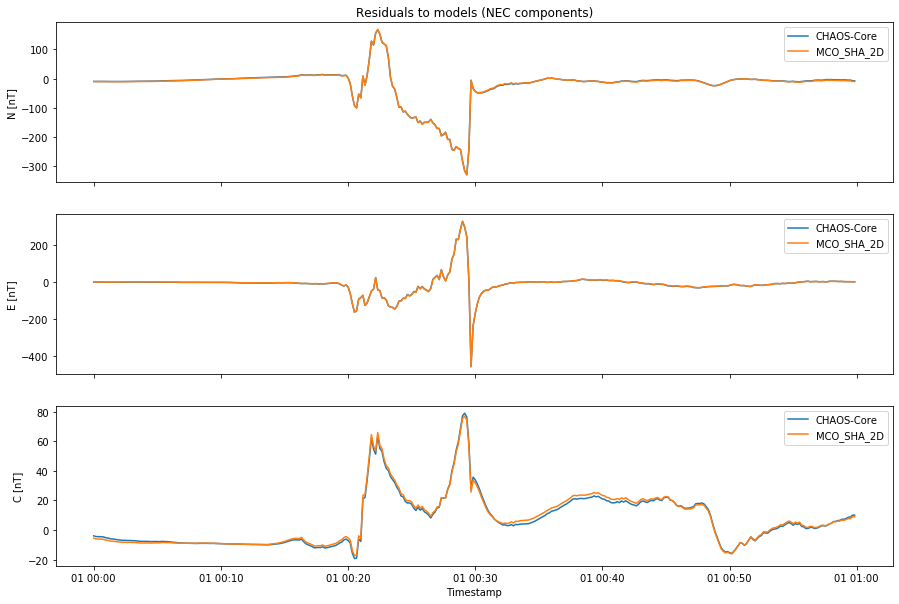

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for i, ax in enumerate(axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            ds["Timestamp"],
            ds[f"B_NEC_res_{model_name}"][:, i],
            label=model_name
        )
    ax.set_ylabel("NEC"[i] + " [nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");
# automatic unit labels will be possible in v0.5.0

Note that xarray also allows convenient direct plotting like:

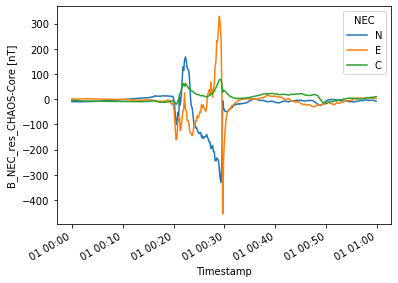

In [19]:
ds["B_NEC_res_CHAOS-Core"].plot.line(x="Timestamp");

## Access multiple MAG datasets simultaneously

It is possible to fetch data from multiple collections simultaneously. Here we fetch the measurements from Swarm Alpha and Bravo. In the returned data, you can differentiate between them using the "Spacecraft" column.

In [20]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B", "SW_OPER_MAGC_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core",],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.072MB)


Spacecraft      Radius  Longitude  F_res_CHAOS-Core  \
Timestamp                                                                 
2014-01-01 00:00:00          A  6878309.22 -14.116674         -7.029809   
2014-01-01 00:00:10          A  6878381.17 -14.131424         -6.750763   
2014-01-01 00:00:20          A  6878452.05 -14.146155         -6.487582   
2014-01-01 00:00:30          A  6878521.87 -14.160861         -6.242720   
2014-01-01 00:00:40          A  6878590.61 -14.175534         -5.953339   

                     Latitude  B_NEC_res_CHAOS-Core_N  B_NEC_res_CHAOS-Core_E  \
Timestamp                                                                       
2014-01-01 00:00:00 -1.228938               -9.814115                0.761157   
2014-01-01 00:00:10 -1.862521               -9.752584                1.671401   
2014-01-01 00:00:20 -2.496090               -9.705906                1.847525   
2014-01-01 00:00:30 -3.129644               -9.713865                1.620812   
2014-01-01 00:00:40 -3.763184               -9.764262                0.910686   

                     B_NEC_res_CHAOS-Core_C  
Timestamp                                    
2014-01-01 00:00:00               -3.948587  
2014-01-01 00:00:10               -4.399591  
2014-01-01 00:00:20               -4.501772  
2014-01-01 00:00:30               -4.505953  
2014-01-01 00:00:40               -4.538907

In [21]:
df[df["Spacecraft"] == "A"].head()

Spacecraft      Radius  Longitude  F_res_CHAOS-Core  \
Timestamp                                                                 
2014-01-01 00:00:00          A  6878309.22 -14.116674         -7.029809   
2014-01-01 00:00:10          A  6878381.17 -14.131424         -6.750763   
2014-01-01 00:00:20          A  6878452.05 -14.146155         -6.487582   
2014-01-01 00:00:30          A  6878521.87 -14.160861         -6.242720   
2014-01-01 00:00:40          A  6878590.61 -14.175534         -5.953339   

                     Latitude  B_NEC_res_CHAOS-Core_N  B_NEC_res_CHAOS-Core_E  \
Timestamp                                                                       
2014-01-01 00:00:00 -1.228938               -9.814115                0.761157   
2014-01-01 00:00:10 -1.862521               -9.752584                1.671401   
2014-01-01 00:00:20 -2.496090               -9.705906                1.847525   
2014-01-01 00:00:30 -3.129644               -9.713865                1.620812   
2014-01-01 00:00:40 -3.763184               -9.764262                0.910686   

                     B_NEC_res_CHAOS-Core_C  
Timestamp                                    
2014-01-01 00:00:00               -3.948587  
2014-01-01 00:00:10               -4.399591  
2014-01-01 00:00:20               -4.501772  
2014-01-01 00:00:30               -4.505953  
2014-01-01 00:00:40               -4.538907

In [22]:
df[df["Spacecraft"] == "C"].head()

Spacecraft      Radius  Longitude  F_res_CHAOS-Core  \
Timestamp                                                                 
2014-01-01 00:00:00          C  6877665.99 -14.420068        -10.398368   
2014-01-01 00:00:10          C  6877747.67 -14.434576        -10.026707   
2014-01-01 00:00:20          C  6877828.39 -14.449141         -9.737933   
2014-01-01 00:00:30          C  6877908.15 -14.463755         -9.526265   
2014-01-01 00:00:40          C  6877986.93 -14.478412         -9.306678   

                     Latitude  B_NEC_res_CHAOS-Core_N  B_NEC_res_CHAOS-Core_E  \
Timestamp                                                                       
2014-01-01 00:00:00  5.908082              -10.417588                1.895748   
2014-01-01 00:00:10  5.274386              -10.213451                2.031666   
2014-01-01 00:00:20  4.640702              -10.128052                1.935491   
2014-01-01 00:00:30  4.007030              -10.237920                1.539257   
2014-01-01 00:00:40  3.373371              -10.336332                1.068366   

                     B_NEC_res_CHAOS-Core_C  
Timestamp                                    
2014-01-01 00:00:00               -0.353263  
2014-01-01 00:00:10               -0.977793  
2014-01-01 00:00:20               -1.419892  
2014-01-01 00:00:30               -1.955235  
2014-01-01 00:00:40               -2.353611

### ... or using xarray

In [23]:
ds = data.as_xarray()
ds.where(ds["Spacecraft"] == "A", drop=True)

<xarray.Dataset>
Dimensions:               (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.814 0.7612 ... 2.925 10.1
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    F_res_CHAOS-Core      (Timestamp) float64 -7.03 -6.751 ... 5.201 5.203
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"]
    RangeFilters:    []